# Iris Data Classification

### Objectives 

1. Boston 집값 예측하기
2. Mini-batch gradient descent 와 Stochastic gradient descent 의 차이점 알기

In [1]:
%pylab inline
import csv
import pandas as pd
import numpy as np
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


# Data 
여러 조건들에 따른 보스턴 집값 데이터입니다.

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

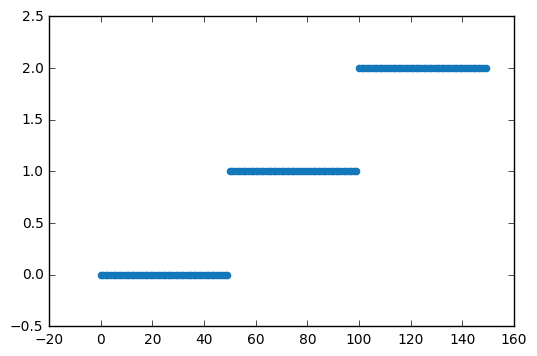

In [2]:
iris = datasets.load_iris()
permu = np.random.permutation(len(iris.data))
data = iris.data[permu]
target = iris.target[permu]

x_trains = data[:110]
y_trains = target[:110]
x_tests = data[110:]
y_tests = target[110:]

def sample(n=10):
    rint = np.random.randint(0, len(x_tests))
    return x_tests[rint], y_tests[rint]
    

print iris.DESCR
print 'X train shape: %s, Y train shape: %s'% (x_trains.shape, y_trains.shape)
print 'X test shape: %s, Y test shape: %s' % (x_tests.shape, y_tests.shape)
pylab.scatter(xrange(len(iris.target)), iris.target, color='#1277bb')

# Neural Network with mini-batch gradient descent

Mini-batch Gradient Descent를 통해서 fitting line을 찾는 예제 입니다.

# Sigmoid and Derivative of sigmoidm

sigmoid function 는 다음과 같습니다.

$$ \sigma(x) = \dfrac{1}{1 + e^{-x}} $$

Derivative of sigmoid 는 다음과 같습니다.

$$ \dfrac{d}{dx}\sigma(x) = \sigma(x)(1 - \sigma(x)) $$

자세한 설명.. 

$$ \begin{align}
\dfrac{d}{dx} \sigma(x) &= \dfrac{d}{dx} \left[ \dfrac{1}{1 + e^{-x}} \right] \\
&= \dfrac{d}{dx} \left( 1 + \mathrm{e}^{-x} \right)^{-1} \\
&= -(1 + e^{-x})^{-2}(-e^{-x}) \\
&= \dfrac{e^{-x}}{\left(1 + e^{-x}\right)^2} \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{e^{-x}}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{(1 + e^{-x}) - 1}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( 1 - \dfrac{1}{1 + e^{-x}} \right) \\
&= \sigma(x) \cdot (1 - \sigma(x))
\end{align} $$

In [3]:
class Perceptron(object):
    
    def __init__(self, learning_rate=0.01):
        self.w = np.random.rand(4 + 1, 3) 
        self.eta = learning_rate
                    
    def predict(self, xdata):
        net = xdata.dot(self.w[1:]) + self.w[0]
        net = self.sigmoid(net)
        return net
    
    # our sigmoid function, tanh is a little nicer than the standard 1/(1+e^-x)
    def sigmoid(self, x):
        return 1./(1+np.exp(-x))
    
    def dsigmoid(self, y):
        return y * (1 - y)

    def relu(self, net):
        return np.maximum(net, 0)
    
    def train(self,n_episode=50):
        
        for self.step in xrange(n_episode):
            _errors = []
            for i in range(10000):
                sample_x, sample_y = self._train_sample()
                output = self.predict(sample_x)
                
                # derivative of sigmoid
                errors = sample_y - output
                delta = errors * self.dsigmoid(output)
                                
                self.w[1:] += self.eta * sample_x.T.dot(delta)
                self.w[0] = self.eta * np.sum(delta)
                
                _errors.append(errors)
            print '\rcost: %s' % str(sum(_errors)/len(_errors)),
               
    
    def _train_sample(self):
        xs = np.zeros((10, 4), dtype='float32')
        ys = np.zeros((10, 3), dtype='float32')
        
        for i in range(10):
            rint = self._rand()
            xs[i] = x_trains[rint]
            ys[i, y_trains[rint]] = 1
        
        return xs, ys
    
    def _rand(self):
        return np.random.randint(0, len(x_trains))
    
    def save(self):
        np.save(open('weights', 'wb'), perceptron.w)
        
    def load(self):
        self.w = np.load(open('weights', 'rb'))
    
    def cost(self, predicted_ys, ys):
        ys - predicted_ys
        
        
perceptron = Perceptron()
perceptron.load()
# perceptron.train()

In [4]:
count = 0
for _ in xrange(5000):
    x, y = sample()
    if np.argmax(perceptron.predict(x)) == y:
        count += 1

print 'accuracy: ' + str(count/5000.)

accuracy: 0.9824


### References

* [A Neural Network in 11 lines of Python (Part 1)](http://iamtrask.github.io/2015/07/12/basic-python-network/)